 # COVID-19 Portfolio Analysis Update, Using Modern Portfolio Theory (MPT)
 
Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

##### Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security. This portfolio was created for perspective research only using Financial Engineering strategies for portfolio management and optimization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
COVID19_Stocks = pd.read_csv("COVID19_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

In [4]:
COVID19_Stocks = COVID19_Stocks.loc["2020-2-23":"2020-5-26"]

In [5]:
COVID19_Stocks.tail().dropna()

,AAPL,AMZN,CMG,CRM,GOOGL,HRL,JNJ,LMT,MA,MSFT,NKE,NOC,PEP,PG,SHOP,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,
2020-05-18,314.96,2426.26,998.58,172.50,1385.18,48.15,149.48,377.54,289.90,184.40,91.04,331.17,135.52,116.21,738.02,76.63,813.63,191.38,99.66
2020-05-19,313.14,2449.33,1009.08,176.04,1374.40,47.39,147.99,371.48,290.73,183.12,91.51,327.03,131.73,112.44,753.01,79.25,808.01,189.36,98.33
2020-05-20,319.23,2497.94,1029.96,176.93,1409.16,47.99,146.66,362.51,298.80,185.66,92.95,320.40,131.26,113.28,778.00,82.04,815.56,193.86,99.45
2020-05-21,316.85,2446.74,1026.71,175.26,1406.75,46.01,145.70,368.82,294.26,183.43,94.26,328.11,130.21,111.62,802.35,81.49,827.60,190.62,98.93
2020-05-22,318.89,2436.88,1055.70,177.85,1413.24,46.93,144.37,369.00,294.91,183.51,93.75,325.91,130.48,112.60,825.17,81.49,816.88,190.86,98.92


In [6]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Daily Returns since the impact of COVID-19:

In [9]:
ret = COVID19_Stocks.pct_change().dropna()

In [10]:
ret.tail().dropna()

,AAPL,AMZN,CMG,CRM,GOOGL,HRL,JNJ,LMT,MA,MSFT,NKE,NOC,PEP,PG,SHOP,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,
2020-05-18,0.02,0.01,0.03,0.01,0.01,0.00,0.00,0.05,0.04,0.01,0.05,0.03,-0.00,0.01,-0.04,-0.05,0.02,0.04,0.04
2020-05-19,-0.01,0.01,0.01,0.02,-0.01,-0.02,-0.01,-0.02,0.00,-0.01,0.01,-0.01,-0.03,-0.03,0.02,0.03,-0.01,-0.01,-0.01
2020-05-20,0.02,0.02,0.02,0.01,0.03,0.01,-0.01,-0.02,0.03,0.01,0.02,-0.02,-0.00,0.01,0.03,0.04,0.01,0.02,0.01
2020-05-21,-0.01,-0.02,-0.00,-0.01,-0.00,-0.04,-0.01,0.02,-0.02,-0.01,0.01,0.02,-0.01,-0.01,0.03,-0.01,0.01,-0.02,-0.01
2020-05-22,0.01,-0.00,0.03,0.01,0.00,0.02,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.00,0.01,0.03,0.00,-0.01,0.00,-0.00


Risk and Return due to the impact of COVID-19:

In [11]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.51,0.69
AMZN,0.90,0.50
CMG,1.06,0.85
CRM,0.08,0.72
GOOGL,0.17,0.61
HRL,0.35,0.51
JNJ,0.13,0.54
LMT,-0.23,0.71
MA,-0.05,0.83
MSFT,0.55,0.72


Plot Risk and Returns:

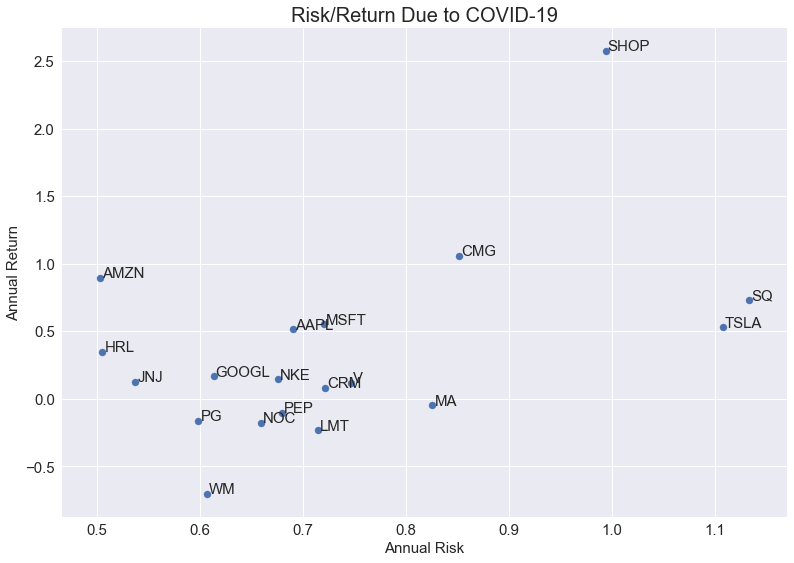

In [12]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Number of stocks in the portfolio (19), and 200,000 simulations of portfolios:

In [14]:
noa = len(COVID19_Stocks.columns)
nop = 200000
print(noa, nop)

19 200000


Creating simulation:

In [15]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

200,000 different weight combinations for each stock in the portfolio:

In [17]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[7.70600498e-02, 3.16595649e-02, 2.50997240e-02, ...,
        2.01915923e-02, 1.94126622e-02, 5.88129039e-02],
       [5.64604607e-02, 6.73499670e-02, 9.01783052e-02, ...,
        3.31506168e-02, 4.52627728e-02, 9.48449554e-02],
       [9.63977232e-02, 5.12369853e-02, 6.37049258e-02, ...,
        3.49958191e-02, 3.10504057e-02, 4.25775196e-02],
       ...,
       [1.20959816e-01, 1.59484254e-01, 1.00563863e-04, ...,
        3.23551713e-02, 6.76275576e-02, 4.12770048e-02],
       [5.20266909e-02, 7.49269969e-02, 1.91447244e-02, ...,
        3.03024898e-02, 2.06957326e-02, 5.48726045e-02],
       [6.46585064e-02, 7.11484137e-02, 6.78725721e-02, ...,
        1.24348139e-02, 7.28317361e-02, 4.13307061e-02]])

In [18]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Daily Returns of 200,000 portfolios:

In [19]:
port_ret = ret.dot(weights.T)

In [20]:
port_ret.tail().dropna()

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-18,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,...,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.02,0.01,0.02
2020-05-19,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01
2020-05-20,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.01,0.01
2020-05-21,-0.00,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,-0.00,...,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,-0.01
2020-05-22,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00


Annual Risk and Return of 200,000 Portfolios

In [21]:
port_summary = ann_risk_return(port_ret)

In [22]:
port_summary.tail().dropna()

,Return,Risk
199995,0.44,0.56
199996,0.35,0.59
199997,0.38,0.60
199998,0.38,0.60
199999,0.28,0.55


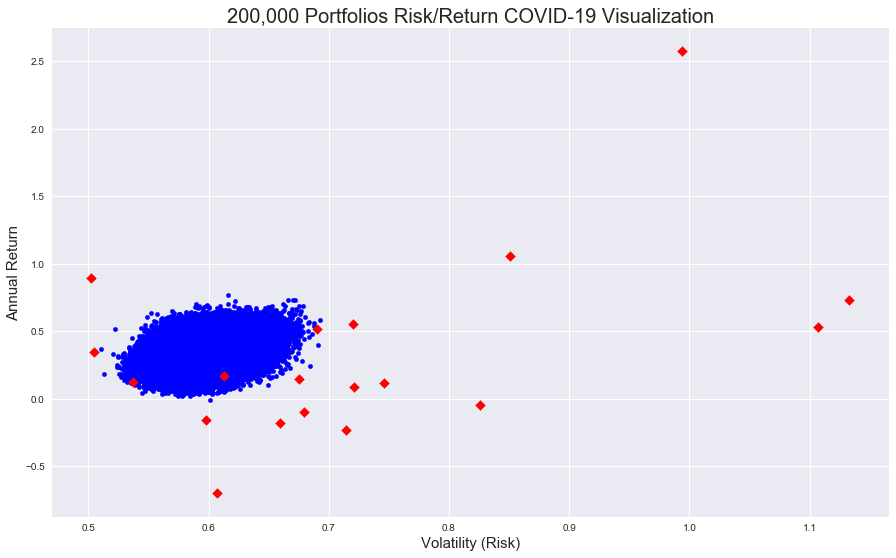

In [23]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "blue")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "red", marker = "D")
plt.xlabel('Volatility (Risk)', fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("200,000 Portfolios Risk/Return COVID-19 Visualization", fontsize = 20)
plt.show()

## Portfolio Analysis With The Sharpe Ratio

Used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from Feb 23 2020 to May 22 2020, we're going to be using the 3 month government bond, which is at 0.11% as the Risk Free rate. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

In [24]:
risk_free_return = 0.011
risk_free_risk = 0

In [25]:
rf = [risk_free_return, risk_free_risk]
rf

[0.011, 0]

Sharpe Ratios for stocks in the portfolio:

In [26]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,0.51,0.69,0.73
AMZN,0.90,0.50,1.76
CMG,1.06,0.85,1.23
CRM,0.08,0.72,0.10
GOOGL,0.17,0.61,0.25
HRL,0.35,0.51,0.67
JNJ,0.13,0.54,0.21
LMT,-0.23,0.71,-0.34
MA,-0.05,0.83,-0.07
MSFT,0.55,0.72,0.75


Stock Sharpe Ratio Analysis: Notice that WM, PG, PEP, NOC, MA, and LMT all have negative values for the sharpe ratio. This mean's we are expecting losses from these stocks. 

Portfolio Sharpe Ratios:

In [27]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [28]:
port_summary.tail().dropna()

,Return,Risk,Sharpe
199995,0.44,0.56,0.76
199996,0.35,0.59,0.58
199997,0.38,0.60,0.62
199998,0.38,0.60,0.61
199999,0.28,0.55,0.48


In [29]:
port_summary.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,0.34,0.60,0.55
std,0.09,0.02,0.15
min,-0.01,0.51,-0.03
25%,0.27,0.58,0.44
50%,0.34,0.60,0.55
75%,0.40,0.61,0.65
max,0.77,0.69,1.23


out of 200,000 portfolio simulations, our maximum results lead to an 77% return, 69% risk and sharpe ratio of 1.23. The best performing portfolios usually have a Sharpe Ratios with 1 or above which is ideal to look for. In over all risk of this portfolio combination is greater then return. 

Plot 200,000 Portfolio Sharpe Ratio Performances. "vmin" comes from "25%", "vmax" comes from max sharpe ratio, and "alpha" comes from "max return" this is also a trial and error process to get the most out of the chart. data inputs comform the describe chart.

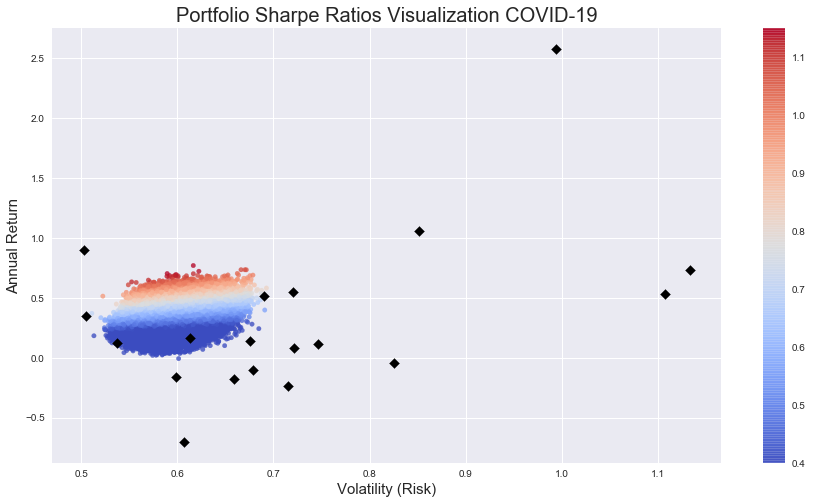

In [32]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.40, vmax = 1.15, alpha = 0.77)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Portfolio Sharpe Ratios Visualization COVID-19", fontsize = 20)
plt.show()

## The Optimal Portfolio - "Max Sharpe Ratio Portfolio"

In [33]:
msrp = port_summary.Sharpe.idxmax()
msrp

117372

Results of the Max Sharpe Ratio Portfolio:

In [34]:
port_summary.loc[msrp]

Return   0.77
Risk     0.62
Sharpe   1.23
Name: 117372, dtype: float64

The "optimal weights" of the portfolio:

In [35]:
msrp_w = weights[msrp, :]
msrp_w

array([0.02349618, 0.02947448, 0.14978493, 0.00264619, 0.05629358,
       0.10812405, 0.01621154, 0.01812541, 0.04487873, 0.05942251,
       0.01094209, 0.01571284, 0.02443707, 0.1254722 , 0.17091584,
       0.09216673, 0.03713132, 0.00397543, 0.01078888])

out of 200,000 portfolio, "The Best Portfolio" consist of the following combinations:

In [37]:
pd.Series(index = COVID19_Stocks.columns, data = msrp_w)

AAPL    0.02
AMZN    0.03
CMG     0.15
CRM     0.00
GOOGL   0.06
HRL     0.11
JNJ     0.02
LMT     0.02
MA      0.04
MSFT    0.06
NKE     0.01
NOC     0.02
PEP     0.02
PG      0.13
SHOP    0.17
SQ      0.09
TSLA    0.04
V       0.00
WM      0.01
dtype: float64

Optimization Analysis: Notice the optimal portfolio, has 0% V and 0% CRM allocations.

## Systematic and Unsystematic Risk 

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

In [38]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,0.51,0.69,0.73,0.48
AMZN,0.90,0.50,1.76,0.25
CMG,1.06,0.85,1.23,0.72
CRM,0.08,0.72,0.10,0.52
GOOGL,0.17,0.61,0.25,0.38
HRL,0.35,0.51,0.67,0.26
JNJ,0.13,0.54,0.21,0.29
LMT,-0.23,0.71,-0.34,0.51
MA,-0.05,0.83,-0.07,0.68
MSFT,0.55,0.72,0.75,0.52


In [39]:
COV = ret.cov()*252

In [40]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [41]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.51,0.69,0.73,0.48,0.31,0.16
AMZN,0.90,0.50,1.76,0.25,0.17,0.09
CMG,1.06,0.85,1.23,0.72,0.23,0.50
CRM,0.08,0.72,0.10,0.52,0.30,0.22
GOOGL,0.17,0.61,0.25,0.38,0.26,0.12
HRL,0.35,0.51,0.67,0.26,0.21,0.04
JNJ,0.13,0.54,0.21,0.29,0.25,0.04
LMT,-0.23,0.71,-0.34,0.51,0.31,0.20
MA,-0.05,0.83,-0.07,0.68,0.34,0.34
MSFT,0.55,0.72,0.75,0.52,0.32,0.20


### Systematic and Unsystematic Risk bar graph

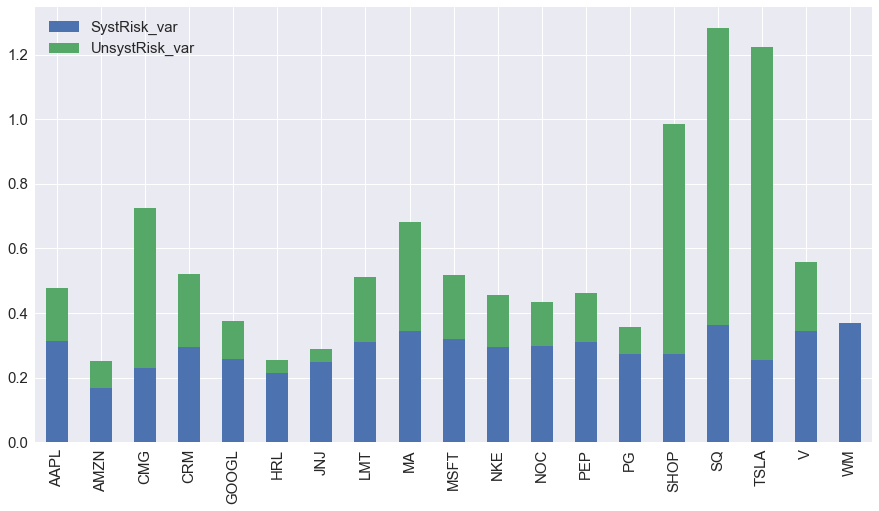

In [42]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In general we want a balance between systematic and unsystematic risk. Systematic risk has to do with the stock getting affected by the overall market, and the stocks in this portfolio that gets affected by the market condidtions the most due to COVID-19 are Apple, Amazon, Google, JNJ, and Waste Management. the stocks that have the highest Unsystematic risk also company specific risk are CMG, SHOP, SQ, TSLA. 

## Including the Market Portfolio

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. The Market Portfolio is also referred to as the S&P500 index.

In [43]:
COVID19_Stocks = pd.read_csv("COVID19_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [45]:
COVID19_Stocks = COVID19_Stocks.loc["2020-2-23":"2020-5-26"]
SP500_Index = SP500_Index.loc["2020-2-23":"2020-5-26"]

Closing Prices of the S&P 500 index:

In [46]:
SP500_Index.tail().dropna()

,Adj Close
Date,
2020-05-18,2953.91
2020-05-19,2922.94
2020-05-20,2971.61
2020-05-21,2948.51
2020-05-22,2955.45


In [48]:
COVID19_Stocks["MP"] = SP500_Index["Adj Close"]

Closing Prices of the stocks including the Market Portfolio:

In [49]:
COVID19_Stocks.tail().dropna()

,AAPL,AMZN,CMG,CRM,GOOGL,HRL,JNJ,LMT,MA,MSFT,NKE,NOC,PEP,PG,SHOP,SQ,TSLA,V,WM,MP
Date,,,,,,,,,,,,,,,,,,,,
2020-05-18,314.96,2426.26,998.58,172.50,1385.18,48.15,149.48,377.54,289.90,184.40,91.04,331.17,135.52,116.21,738.02,76.63,813.63,191.38,99.66,2953.91
2020-05-19,313.14,2449.33,1009.08,176.04,1374.40,47.39,147.99,371.48,290.73,183.12,91.51,327.03,131.73,112.44,753.01,79.25,808.01,189.36,98.33,2922.94
2020-05-20,319.23,2497.94,1029.96,176.93,1409.16,47.99,146.66,362.51,298.80,185.66,92.95,320.40,131.26,113.28,778.00,82.04,815.56,193.86,99.45,2971.61
2020-05-21,316.85,2446.74,1026.71,175.26,1406.75,46.01,145.70,368.82,294.26,183.43,94.26,328.11,130.21,111.62,802.35,81.49,827.60,190.62,98.93,2948.51
2020-05-22,318.89,2436.88,1055.70,177.85,1413.24,46.93,144.37,369.00,294.91,183.51,93.75,325.91,130.48,112.60,825.17,81.49,816.88,190.86,98.92,2955.45


Daily Returns:

In [51]:
ret = COVID19_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a list of the daily returns

In [52]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Risk and Return of the stocks including the Market Portfolio due to COVID-19:

In [53]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.51,0.69
AMZN,0.90,0.50
CMG,1.06,0.85
CRM,0.08,0.72
GOOGL,0.17,0.61
HRL,0.35,0.51
JNJ,0.13,0.54
LMT,-0.23,0.71
MA,-0.05,0.83
MSFT,0.55,0.72


Risk/Return Including the Market Portfolio:

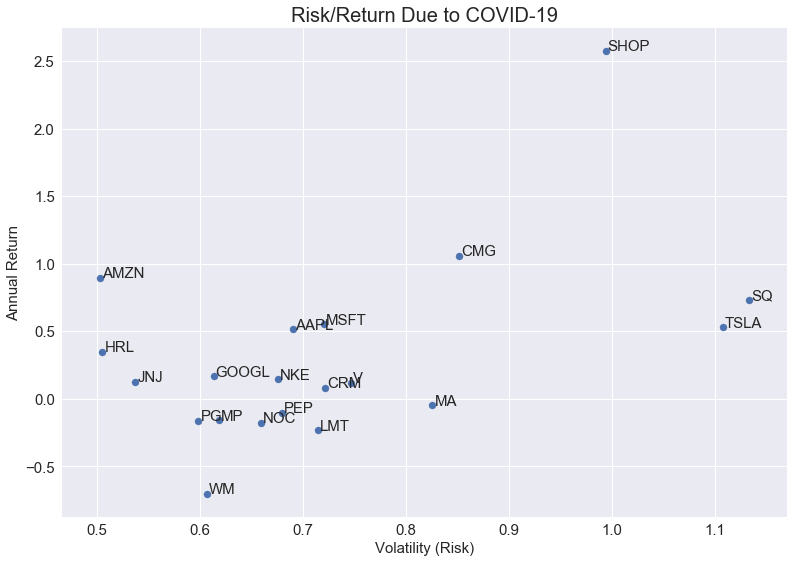

In [54]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Calculating the Sharpe Ratio including the Market Portfolio (MP):

In [55]:
risk_free_return = 0.011
risk_free_risk = 0

In [56]:
rf = [risk_free_return, risk_free_risk]
rf

[0.011, 0]

Sharpe Ratio of stocks and the Market Portfolio:

In [57]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,0.51,0.69,0.73
AMZN,0.90,0.50,1.76
CMG,1.06,0.85,1.23
CRM,0.08,0.72,0.10
GOOGL,0.17,0.61,0.25
HRL,0.35,0.51,0.67
JNJ,0.13,0.54,0.21
LMT,-0.23,0.71,-0.34
MA,-0.05,0.83,-0.07
MSFT,0.55,0.72,0.75


Notice that the Market Porfolo has a negative sharpe ratio, this generally moves we're expecting negative returns.

In [58]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,0.51,0.69,0.73,0.48
AMZN,0.90,0.50,1.76,0.25
CMG,1.06,0.85,1.23,0.72
CRM,0.08,0.72,0.10,0.52
GOOGL,0.17,0.61,0.25,0.38
HRL,0.35,0.51,0.67,0.26
JNJ,0.13,0.54,0.21,0.29
LMT,-0.23,0.71,-0.34,0.51
MA,-0.05,0.83,-0.07,0.68
MSFT,0.55,0.72,0.75,0.52


In [59]:
COV = ret.cov()*252
# COV, if we add "COV" it'll create a long chart

In [60]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [61]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.51,0.69,0.73,0.48,0.40,0.07
AMZN,0.90,0.50,1.76,0.25,0.23,0.02
CMG,1.06,0.85,1.23,0.72,0.34,0.38
CRM,0.08,0.72,0.10,0.52,0.39,0.13
GOOGL,0.17,0.61,0.25,0.38,0.35,0.03
HRL,0.35,0.51,0.67,0.26,0.18,0.07
JNJ,0.13,0.54,0.21,0.29,0.27,0.02
LMT,-0.23,0.71,-0.34,0.51,0.34,0.17
MA,-0.05,0.83,-0.07,0.68,0.46,0.22
MSFT,0.55,0.72,0.75,0.52,0.42,0.10


### Systematic and Unsystematic risk of stocks including the Market Portfolio (S&P500 Index):

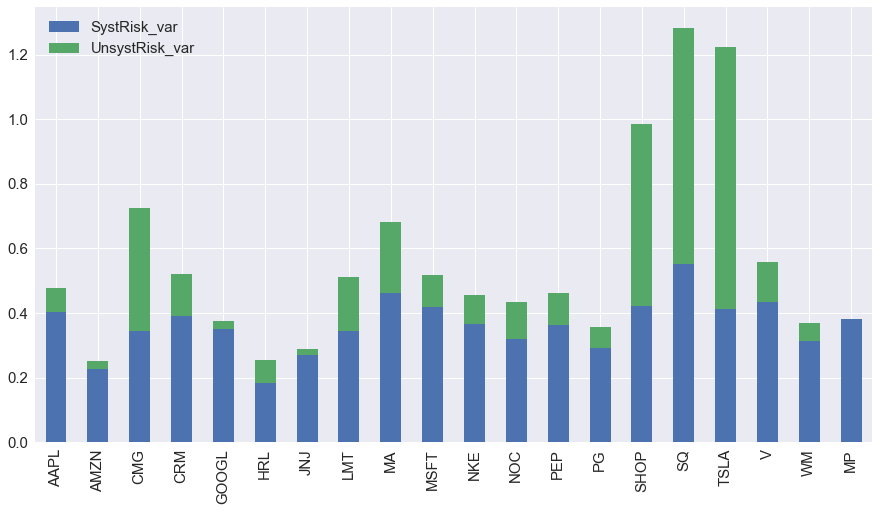

In [62]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Determining the beta of the stocks in the portfolio compared to the Market Portfolio:
Beta is a measure of the volatility, or systematic risk, of a security or portfolio, in comparison to the market as a whole. 

In [63]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,0.51,0.69,0.73,0.48,0.40,0.07,1.05
AMZN,0.90,0.50,1.76,0.25,0.23,0.02,0.60
CMG,1.06,0.85,1.23,0.72,0.34,0.38,0.90
CRM,0.08,0.72,0.10,0.52,0.39,0.13,1.03
GOOGL,0.17,0.61,0.25,0.38,0.35,0.03,0.92
HRL,0.35,0.51,0.67,0.26,0.18,0.07,0.48
JNJ,0.13,0.54,0.21,0.29,0.27,0.02,0.70
LMT,-0.23,0.71,-0.34,0.51,0.34,0.17,0.90
MA,-0.05,0.83,-0.07,0.68,0.46,0.22,1.21
MSFT,0.55,0.72,0.75,0.52,0.42,0.10,1.10


Stocks with the highest beta at or above 1.10 include : V, SQ, MA, SHOP, and MSFT.

## Determining The Security Market Line

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

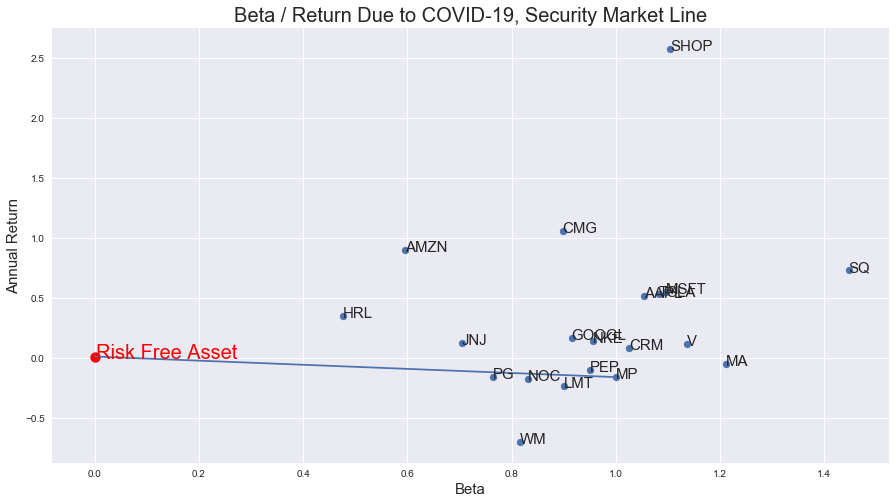

In [65]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Beta / Return Due to COVID-19, Security Market Line", fontsize = 20)
plt.show()

Security Market Line Analysis: since PG, WM, NOC, and LMT all fall below the SML this is an indictor that they are  underperforming the market. HRL, JNJ, PEP, AMZN, GOOGL, NKE, CRM, V, MA, AAPL, TSLA, MSFT, SQ, and CMG are all outperforming the Market.

### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk

In [66]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [67]:
summary["alpha"] = summary.Return - summary.capm_ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,0.51,0.69,0.73,0.48,0.40,0.07,1.05,-0.17,0.68
AMZN,0.90,0.50,1.76,0.25,0.23,0.02,0.60,-0.09,0.99
CMG,1.06,0.85,1.23,0.72,0.34,0.38,0.90,-0.14,1.20
CRM,0.08,0.72,0.10,0.52,0.39,0.13,1.03,-0.16,0.25
GOOGL,0.17,0.61,0.25,0.38,0.35,0.03,0.92,-0.15,0.31
HRL,0.35,0.51,0.67,0.26,0.18,0.07,0.48,-0.07,0.42
JNJ,0.13,0.54,0.21,0.29,0.27,0.02,0.70,-0.11,0.24
LMT,-0.23,0.71,-0.34,0.51,0.34,0.17,0.90,-0.14,-0.09
MA,-0.05,0.83,-0.07,0.68,0.46,0.22,1.21,-0.20,0.15
MSFT,0.55,0.72,0.75,0.52,0.42,0.10,1.10,-0.18,0.73


CAPM and Alpha Analysis: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach above -10% losses, with V, SQ, SHOP, MA and MSFT being the the highest expected losses in this portfolio since they have the highest beta's. Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that WM, PG, NOC, and LMT are the only stock in the Portfolio that have a chance of not beating the over all market which makes since, because they falls below the Security Market Line.